# Student Performance Analysis with Deep Learning

This notebook investigates factors influencing student academic performance using a dataset of behavioral, environmental, and academic features. 
The goal is to uncover actionable insights and demonstrate the application of deep learning techniques in educational data science.

## Workflow Overview
1. Exploratory Data Analysis (EDA)
2. Data Preprocessing and Feature Engineering
3. Regression Modeling to predict exam scores
4. Classification Modeling to categorize performance levels
5. Model Evaluation and Visualization

## Tools Used
- Python (Pandas, NumPy)
- Seaborn, Matplotlib
- Scikit-learn
- TensorFlow / Keras


In [1]:
# Importing the libraries

import numpy as np, random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix
from tensorflow.keras import models, layers

In [2]:
# so runs are consistent.
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

## 1. Data Loading and Exploration

In [3]:
# Loading the dataset

df = pd.read_csv('StudentPerformanceFactors.csv')

In [4]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
df.shape

(6607, 20)

In [8]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [9]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [10]:
# Checking for missing values
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

<Axes: >

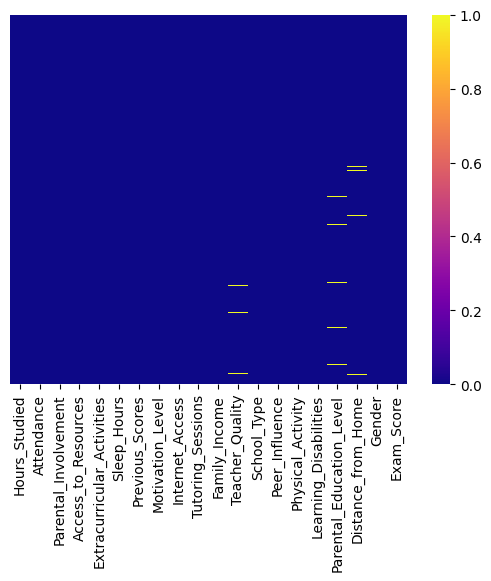

In [11]:
# Visualize missing data in the dataset using a heatmap.
sns.heatmap(df.isnull(), cmap='plasma', yticklabels=False)

In [12]:
# Useful for understanding class balance and guiding encoding strategies.
df['Teacher_Quality'].value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

In [13]:
# Useful for understanding class balance and guiding encoding strategies.
df['Parental_Education_Level'].value_counts()

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [14]:
# Useful for understanding class balance and guiding encoding strategies.
df['Distance_from_Home'].value_counts()

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

## 2. EDA

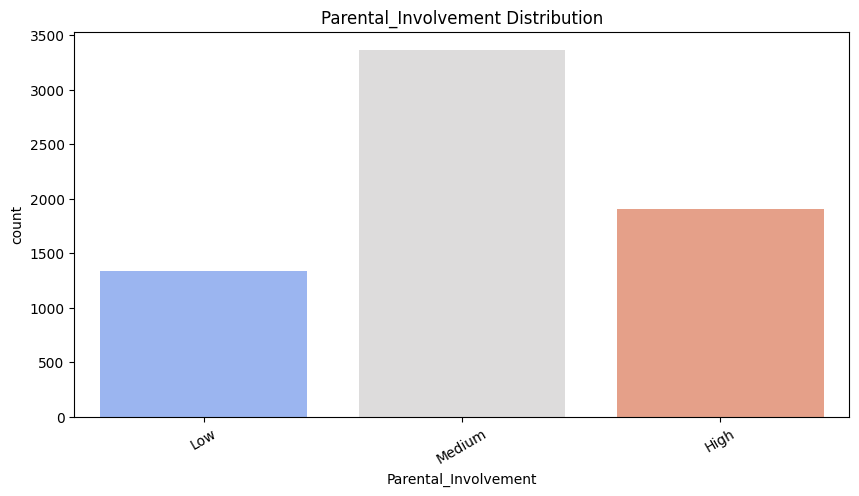

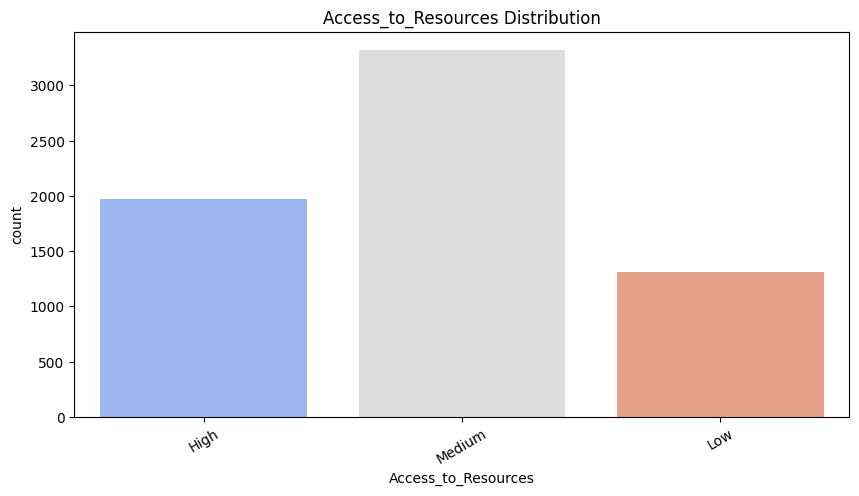

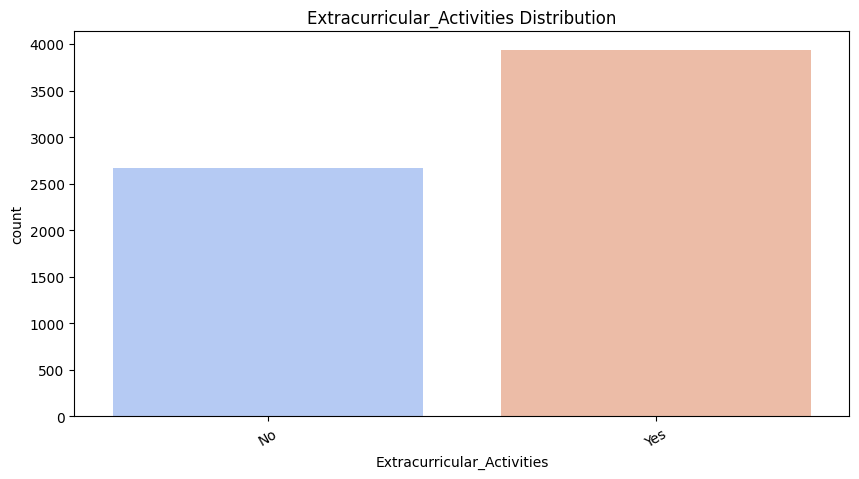

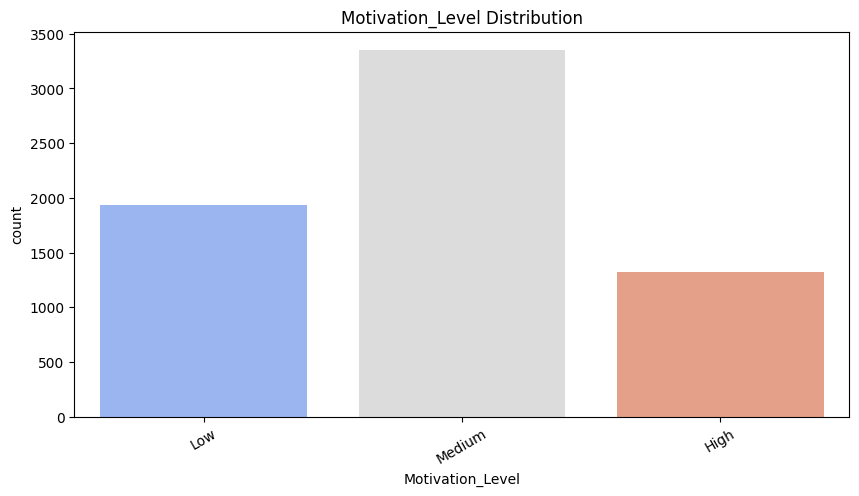

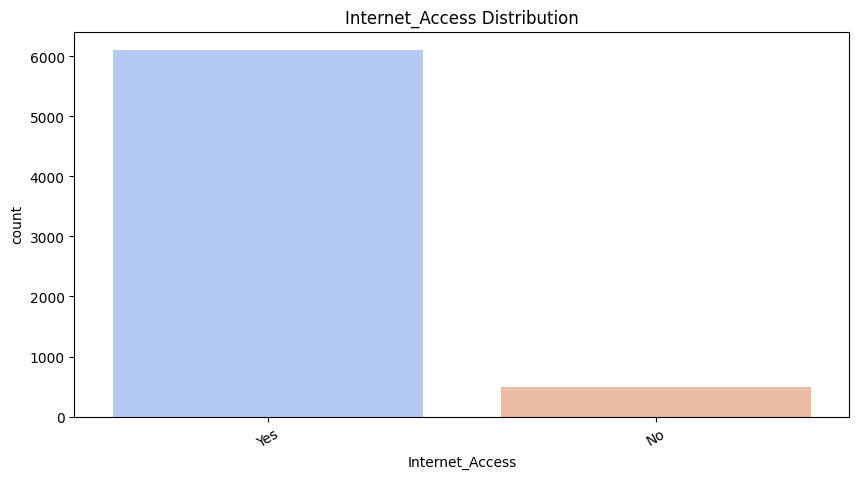

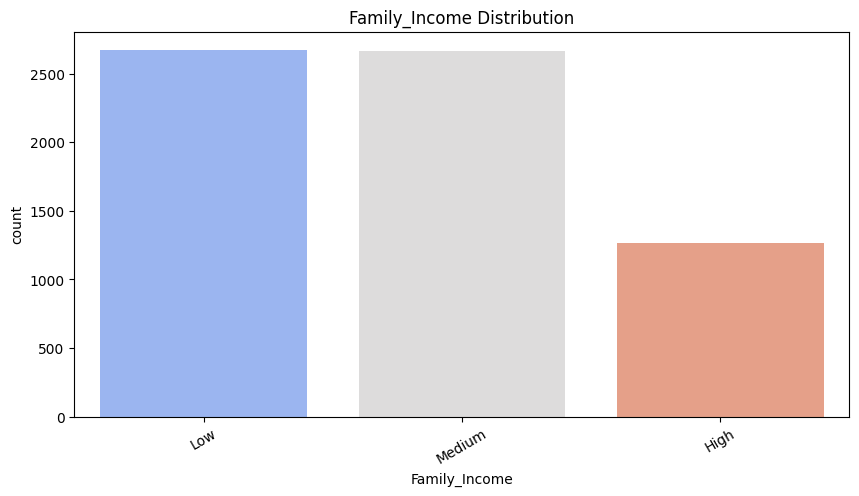

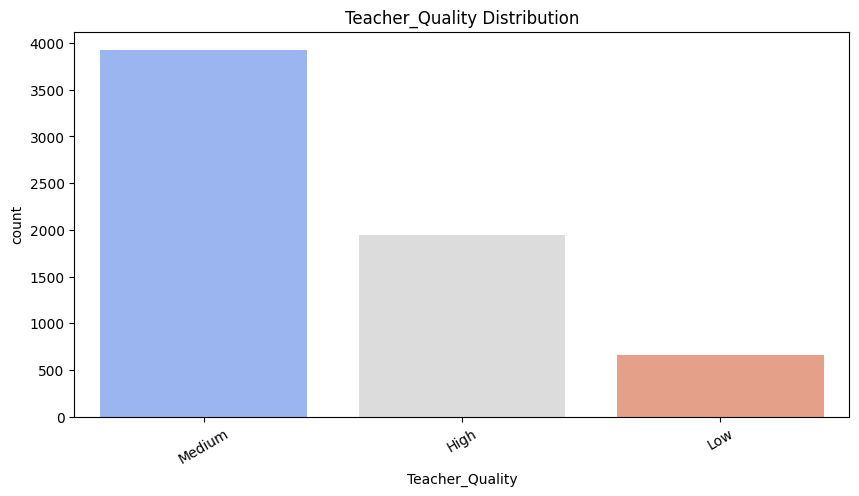

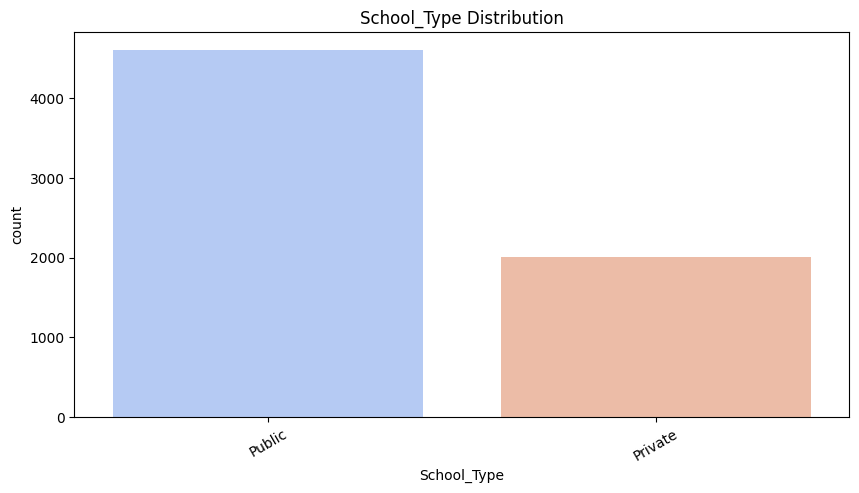

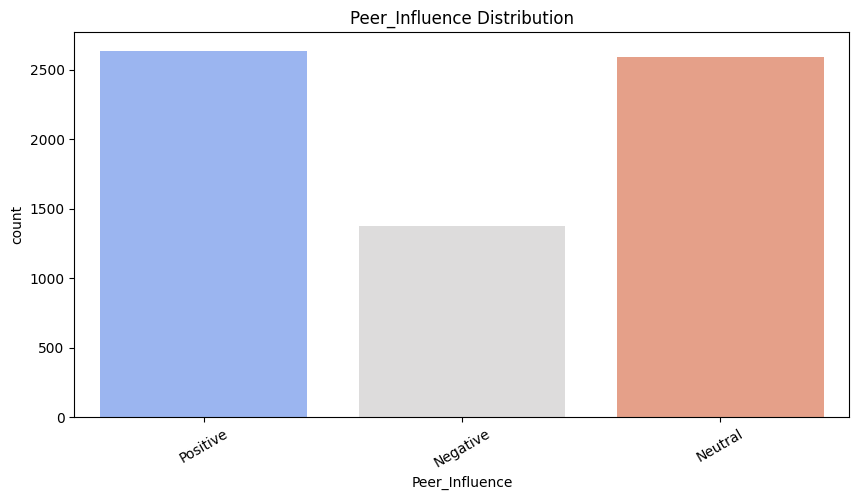

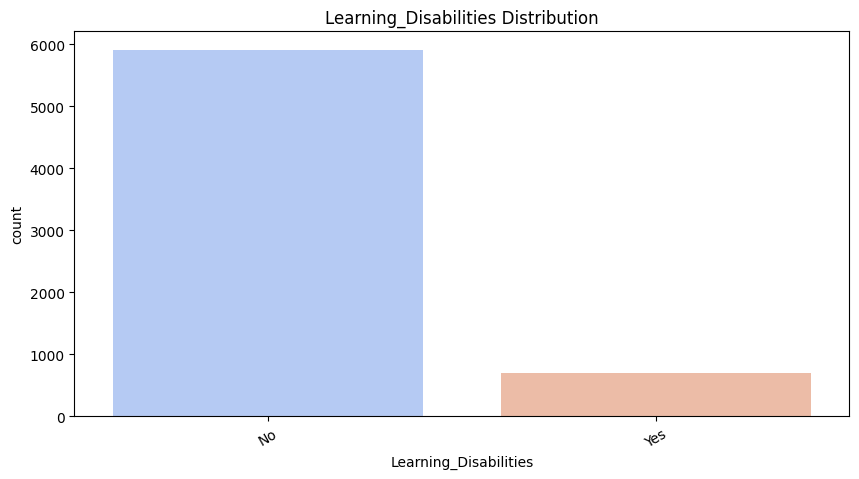

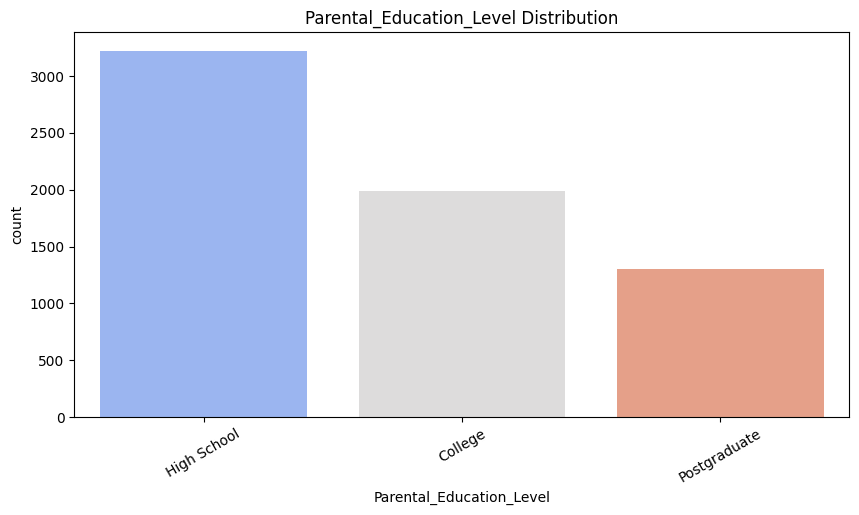

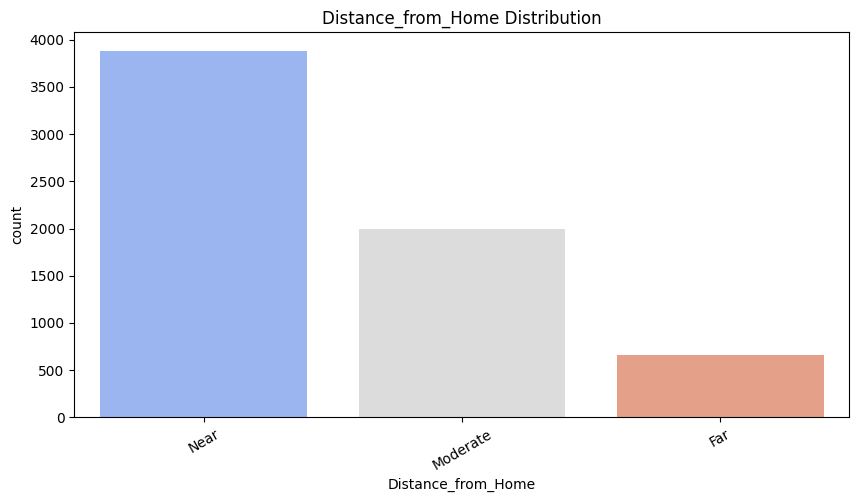

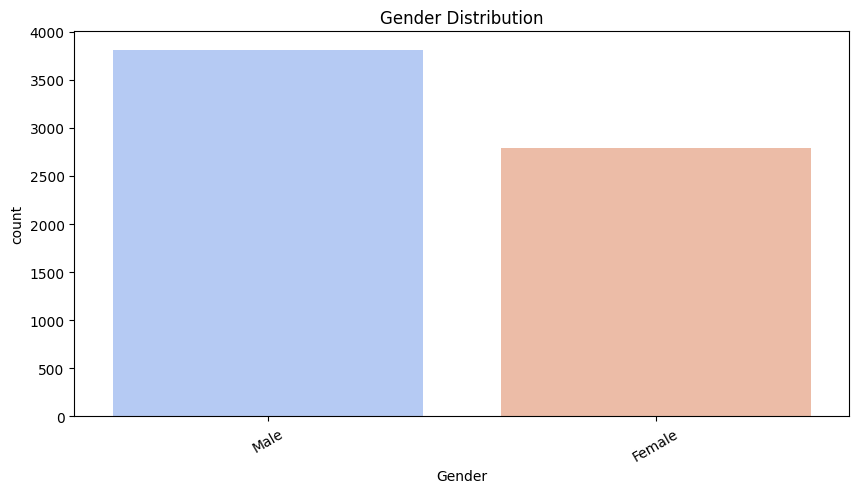

In [15]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object'])

# Categorical columns distribution
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=df, palette='coolwarm')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=30)

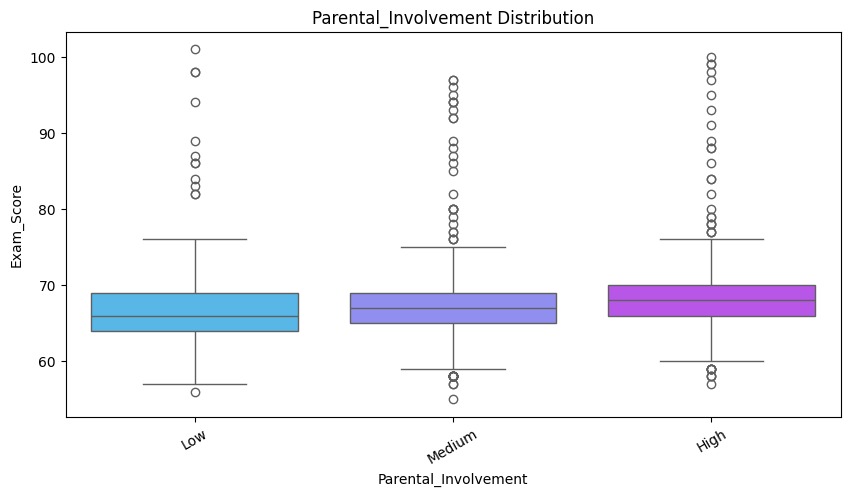

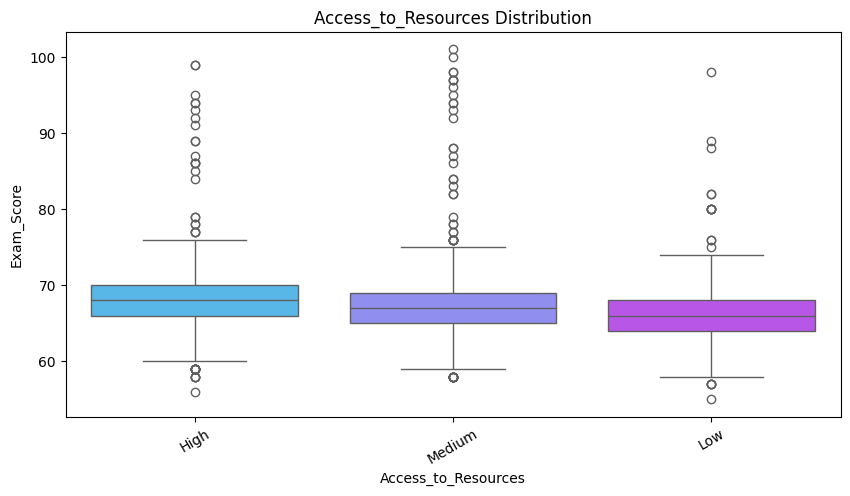

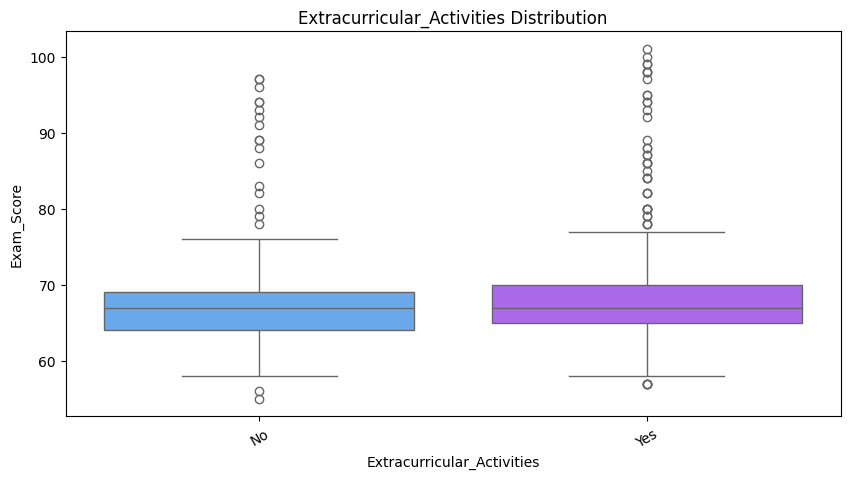

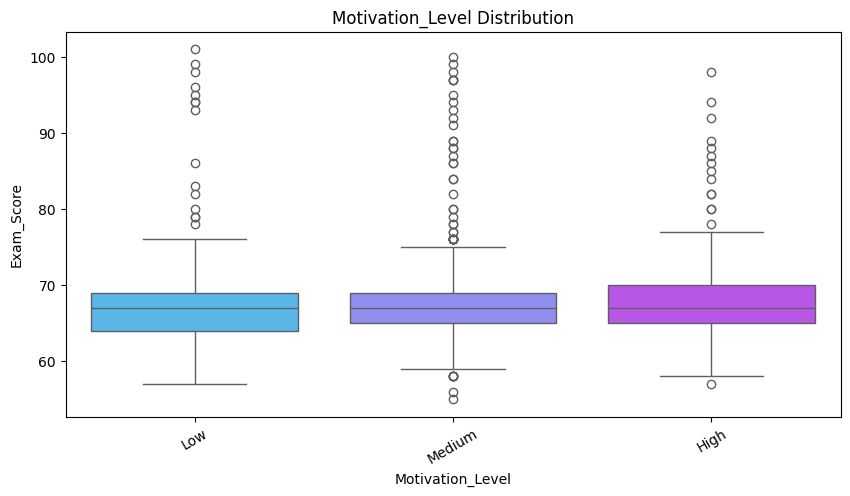

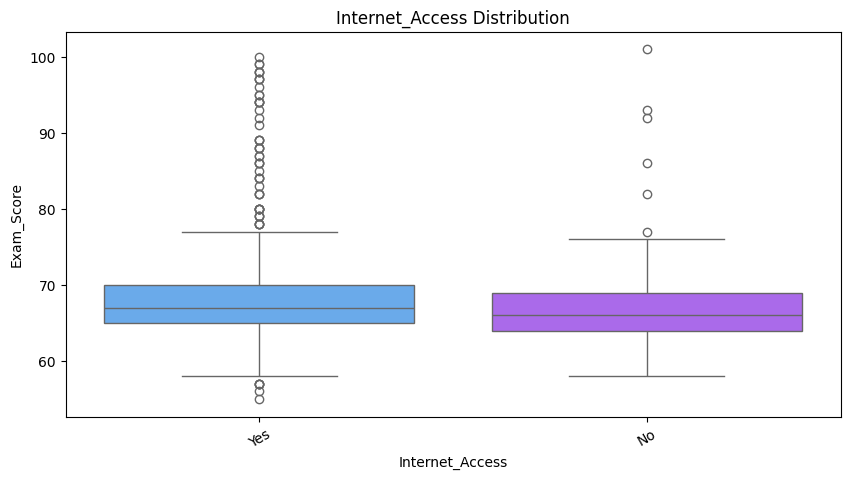

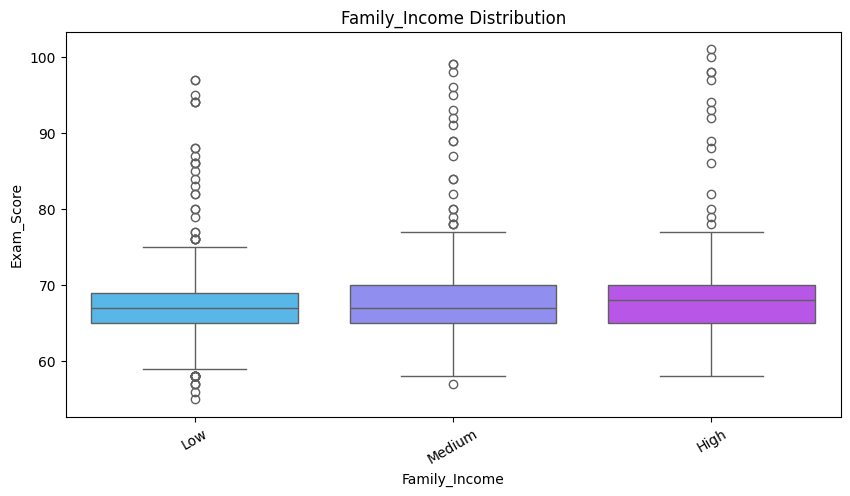

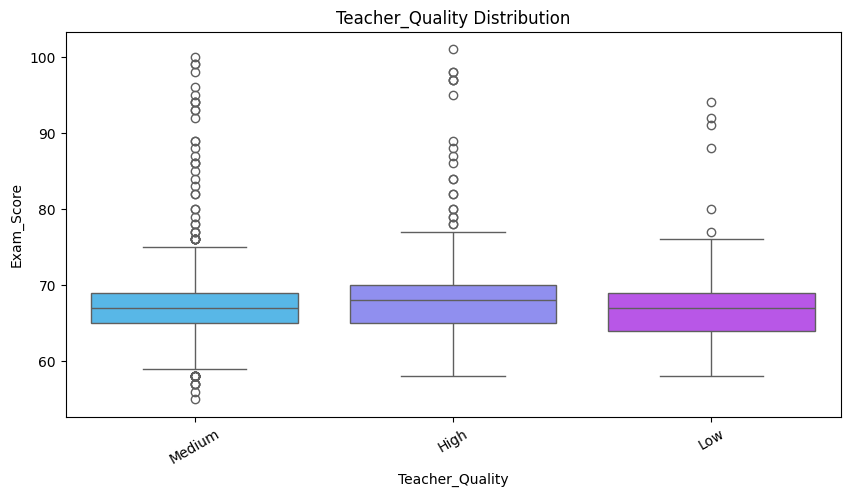

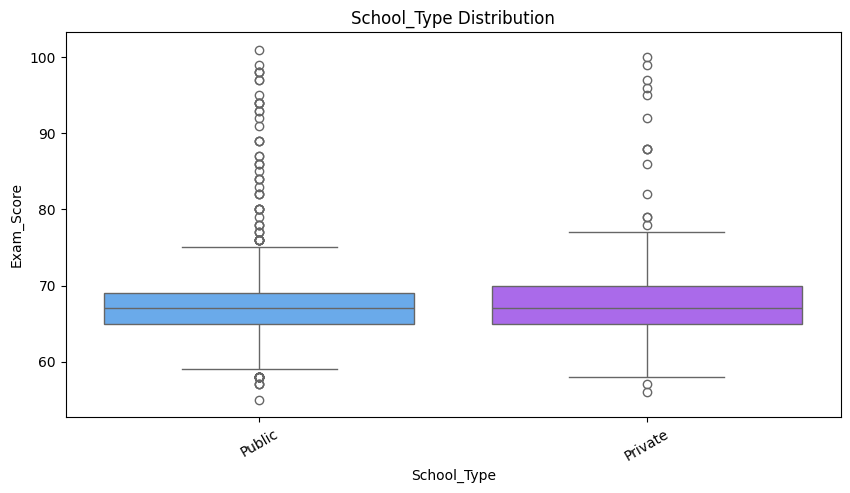

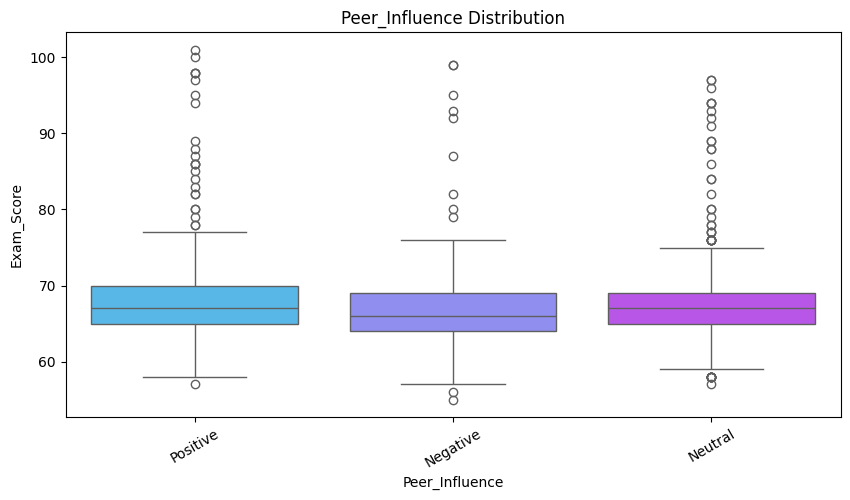

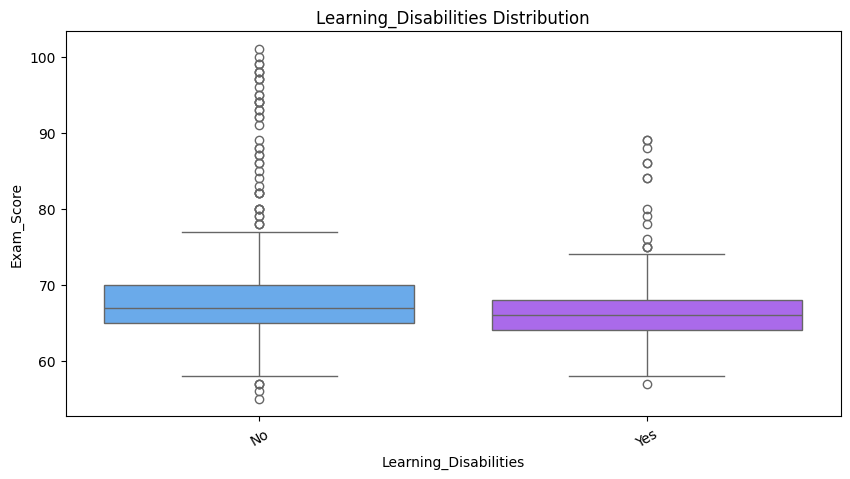

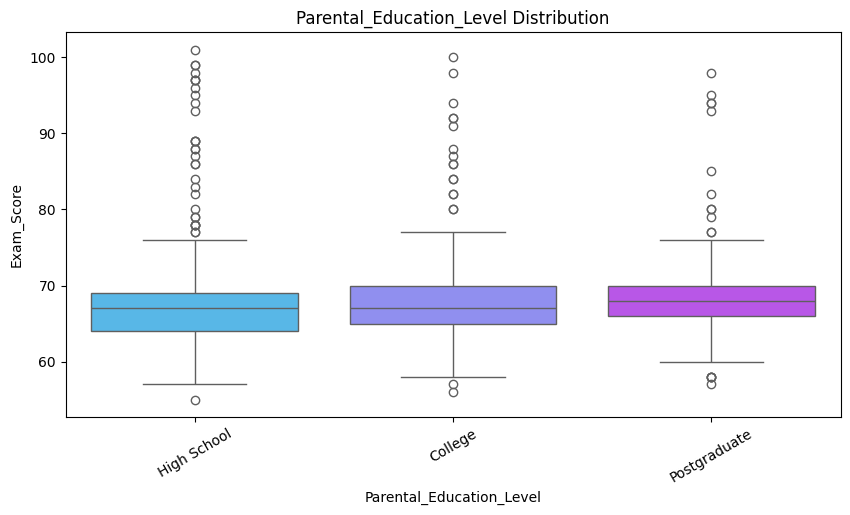

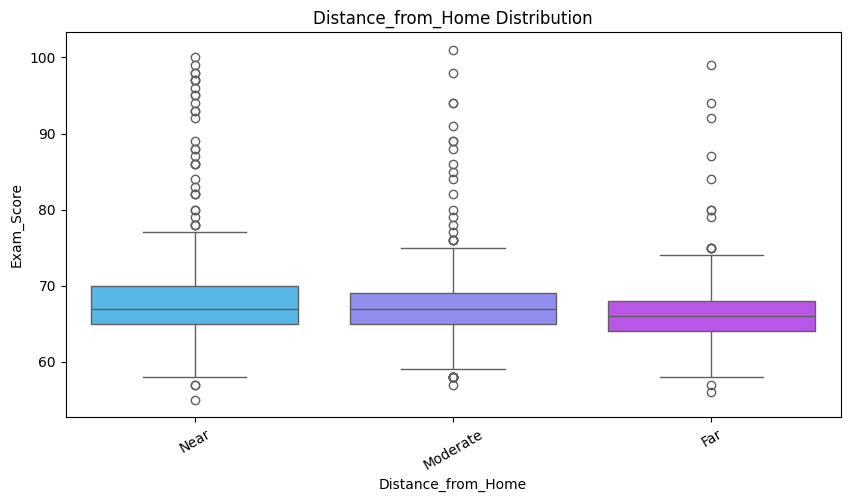

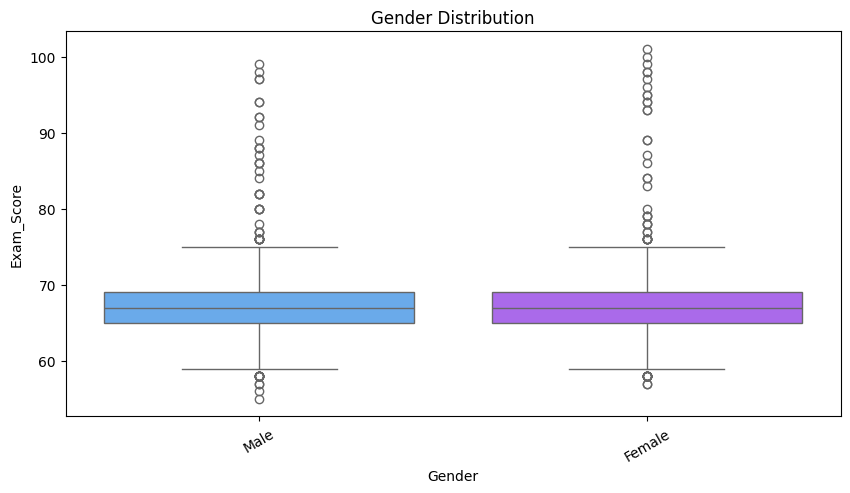

In [16]:
# Boxplot visualization by category
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, data=df, y='Exam_Score', palette='cool')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=30)

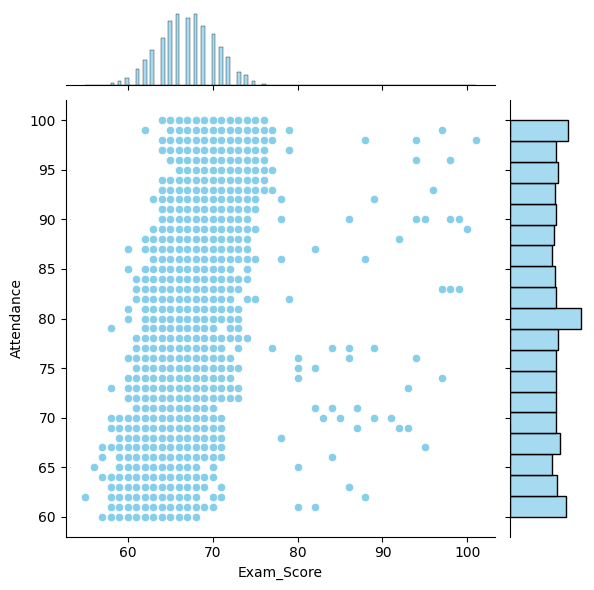

In [17]:
# Visualize the relationship between 'Exam_Score' and 'Attendance' using a jointplot
sns.jointplot(data=df, x='Exam_Score', y='Attendance', color='skyblue')

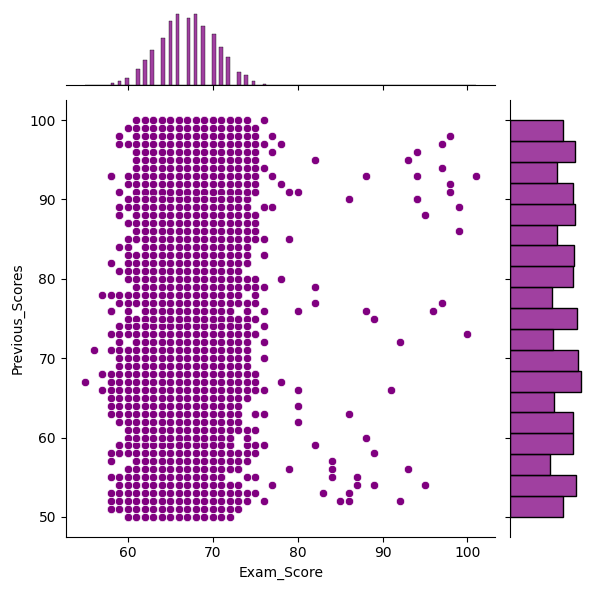

In [18]:
# Visualize the relationship between 'Exam_Score' and 'Previous_Scores' using a jointplot
sns.jointplot(data=df, x='Exam_Score', y='Previous_Scores', color='purple')

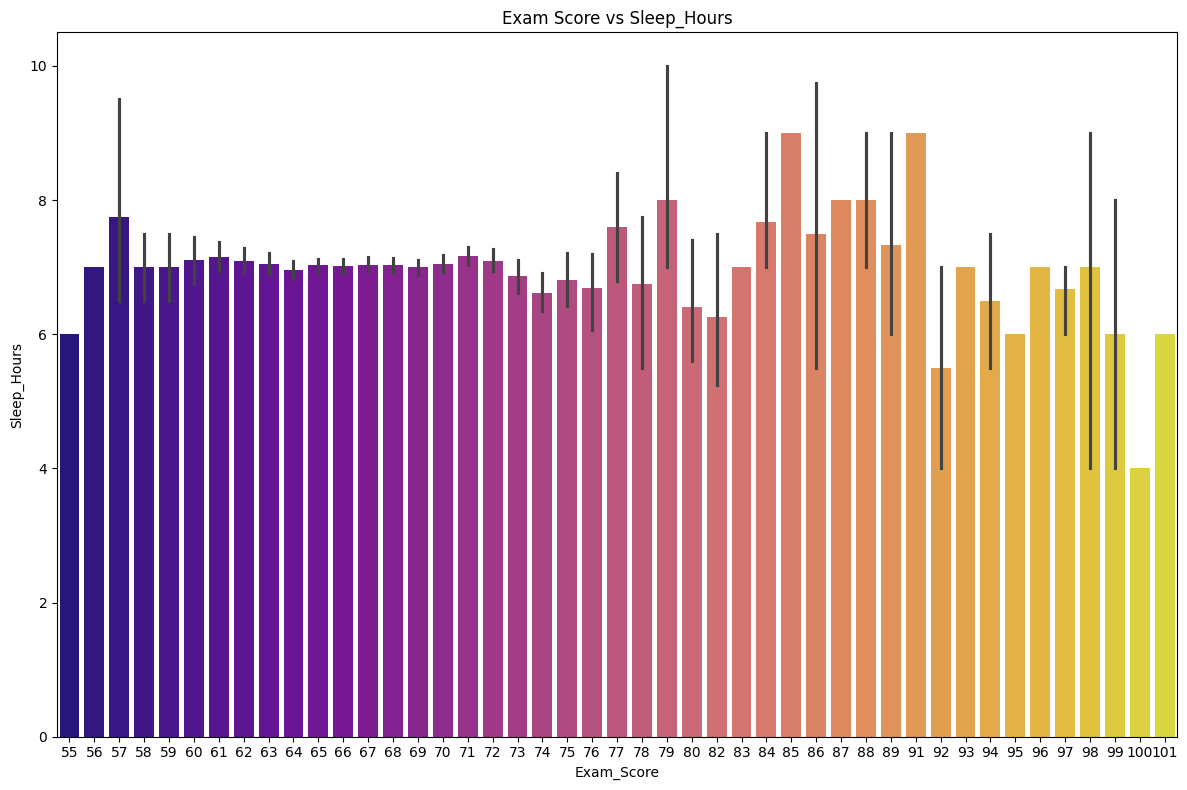

In [19]:
# Visualize the relationship between 'Exam_Score' and 'Sleep_Hours' using a barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Exam_Score', y='Sleep_Hours', palette='plasma')
plt.title('Exam Score vs Sleep_Hours')
plt.tight_layout()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'Hours_Studied'),
  Text(0, 1.5, 'Attendance'),
  Text(0, 2.5, 'Sleep_Hours'),
  Text(0, 3.5, 'Previous_Scores'),
  Text(0, 4.5, 'Tutoring_Sessions'),
  Text(0, 5.5, 'Physical_Activity'),
  Text(0, 6.5, 'Exam_Score')])

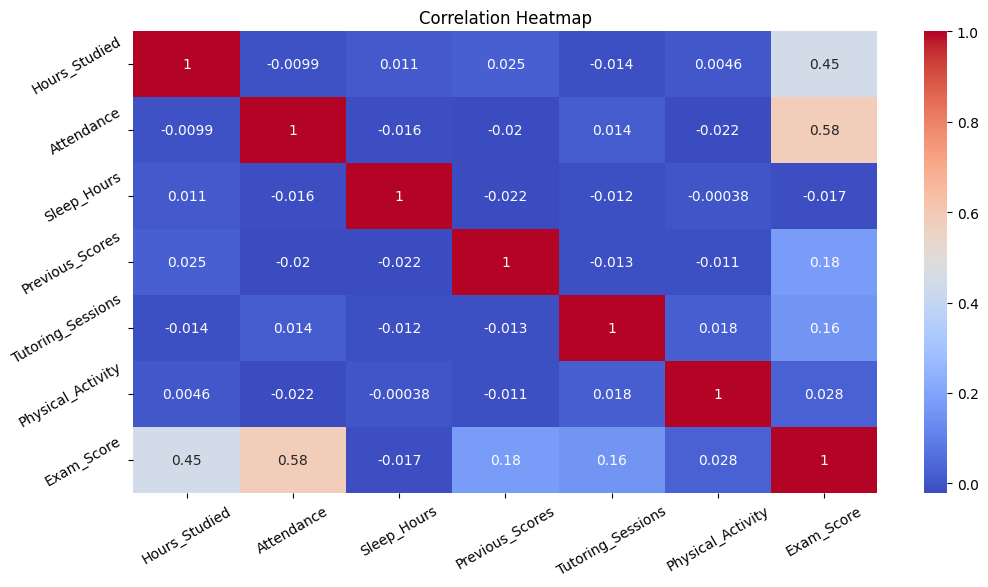

In [20]:
# Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=30)
plt.yticks(rotation=30)

## 3. Data Preprocessing

In [21]:
# Handle missing values
df.fillna(df.mode().iloc[0], inplace=True)

In [22]:
# Identify any rows where 'Exam_Score' exceeds the valid maximum of 100.
df[df['Exam_Score'] > 100]['Exam_Score'].index

Index([1525], dtype='int64')

In [23]:
df[df['Exam_Score'] < 0]['Exam_Score'].index

Index([], dtype='int64')

In [24]:
# Correct the outlier by capping the 'Exam_Score' at 100.
df['Exam_Score'].iloc[1525] = 100

In [25]:
# Verify missing values are handled
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [26]:
# Label encoding
cat_cols = df.select_dtypes(include=['object'])

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [27]:
# Feature/Target separation
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Feature scaling
sc = StandardScaler()
X = sc.fit_transform(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Build and Evaluate ANN

### Regression

In [28]:
# Model definition
ann = models.Sequential([
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [29]:
# Model tcompilation
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [30]:
# Model training
history_reg = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 825.9866 - mae: 18.4895 - val_loss: 31.2145 - val_mae: 4.2896
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 46.6404 - mae: 5.3775 - val_loss: 21.1594 - val_mae: 3.4764
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 39.5254 - mae: 4.8971 - val_loss: 17.1919 - val_mae: 3.0688
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 33.6807 - mae: 4.5294 - val_loss: 13.0774 - val_mae: 2.6153
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.1668 - mae: 4.2173 - val_loss: 10.8834 - val_mae: 2.3217
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.9370 - mae: 4.0764 - val_loss: 9.1038 - val_mae: 2.0460
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 25.6653 - mae: 3.8899 - val_loss: 8.5776 - val_mae: 1.9696
Epoch 8/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 24.1001 - mae: 3.7414 - val_loss: 7.7474 - val_mae: 1.8168
Epoch 9/100
166/166 ━━━━━━━━━━━━━

In [31]:
# Predicting the results of the Test set
y_pred = ann.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [32]:
# Display the architecture of the ANN model
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139,013 (543.02 KB)

 Trainable params: 46,337 (181.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 92,676 (362.02 KB)

In [33]:
# Print Mean Squared Error and R² score for predictions
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.6885117292404175
4.402909755706787


Text(0, 0.5, 'Predicted Values')

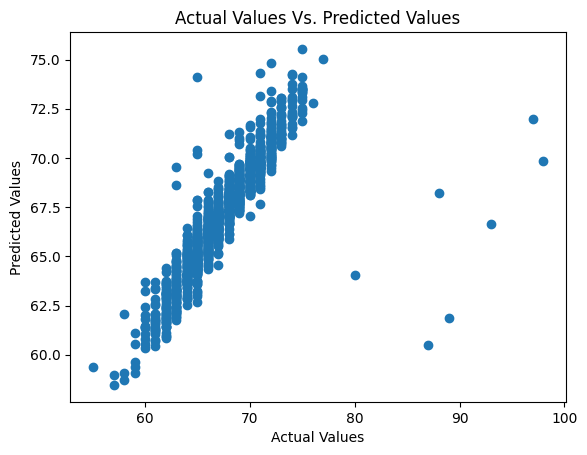

In [34]:
# Visualize the relationship between actual and predicted values
plt.scatter(y_test, y_pred)
plt.title('Actual Values Vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

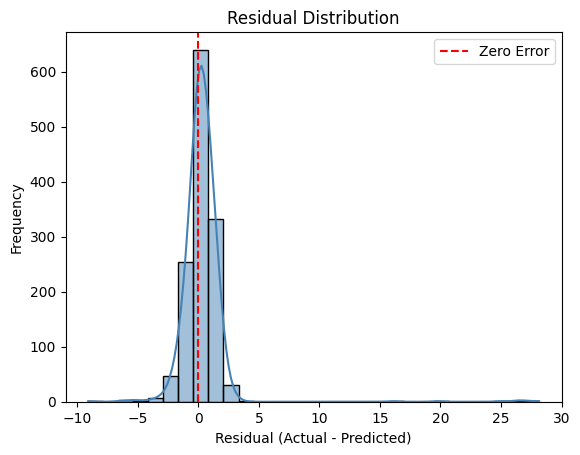

In [35]:
residuals = y_test - y_pred.flatten()

# Plotting residuals to see how prediction errors are distributed around zero
sns.histplot(residuals, bins=30, kde=True, color='steelblue')
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', linewidth=1.5, label='Zero Error')
plt.legend()

### Classification

In [36]:
# Create classification target
df['Performance_Level'] = pd.cut(
    df['Exam_Score'],
    bins=[0, 60, 80, 100],
    labels=['Low', 'Medium', 'High']
)

In [37]:
# Check distribution of 'Performance_Level' categories before encoding.
df['Performance_Level'].value_counts()

Performance_Level
Medium    6419
Low        145
High        43
Name: count, dtype: int64

In [38]:
# Label Encoding 'performance_level'
df['Performance_Level'] = le.fit_transform(df['Performance_Level'])

In [39]:
df['Performance_Level'].value_counts()

Performance_Level
2    6419
1     145
0      43
Name: count, dtype: int64

In [40]:
# Assign encoded 'Performance_Level' as target variable (y).
y = df['Performance_Level']

In [41]:
# Determine number of unique classes in target variable.
num_classes = len(np.unique(y))

In [42]:
# Train-Test split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Model definition
ann = models.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [44]:
# Model compilation
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Model training
history_clf = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9548 - loss: 0.1874 - val_accuracy: 0.9773 - val_loss: 0.0859
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9741 - loss: 0.0956 - val_accuracy: 0.9826 - val_loss: 0.0704
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9779 - loss: 0.0806 - val_accuracy: 0.9841 - val_loss: 0.0666
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9790 - loss: 0.0718 - val_accuracy: 0.9849 - val_loss: 0.0666
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9820 - loss: 0.0653 - val_accuracy: 0.9849 - val_loss: 0.0673
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9845 - loss: 0.0600 - val_accuracy: 0.9849 - val_loss: 0.0689
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9858 - loss: 0.0550 - val_accuracy: 0.9856 - val_loss: 0.0701
Epoch 8/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9877 - loss: 0.0505 - val_accuracy: 0.

In [46]:
df.iloc[0]

Hours_Studied                 23
Attendance                    84
Parental_Involvement           1
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    7
Previous_Scores               73
Motivation_Level               1
Internet_Access                1
Tutoring_Sessions              0
Family_Income                  1
Teacher_Quality                2
School_Type                    1
Peer_Influence                 2
Physical_Activity              3
Learning_Disabilities          0
Parental_Education_Level       1
Distance_from_Home             2
Gender                         1
Exam_Score                    67
Performance_Level              2
Name: 0, dtype: int64

In [47]:
# Inspect input row
df.iloc[0].values

array([23, 84,  1,  0,  0,  7, 73,  1,  1,  0,  1,  2,  1,  2,  3,  0,  1,
        2,  1, 67,  2])

In [48]:
# Make prediction
predictions = ann.predict(sc.fit_transform([[23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1]]))[0]*100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [49]:
# Format prediction output
probability = pd.DataFrame(predictions, columns=['Probability %'])
performance_level = pd.DataFrame(['High', 'Low', 'Medium'], columns=['Performance_level'])
performance_level.join(probability)

,Performance_level,Probability %
0,High,17.162294
1,Low,0.542700
2,Medium,82.295006


In [51]:
# Display the architecture of the ANN model
ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,035 (129.05 KB)

 Trainable params: 11,011 (43.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,024 (86.04 KB)

## 5. Visualization of Deep Learning Training

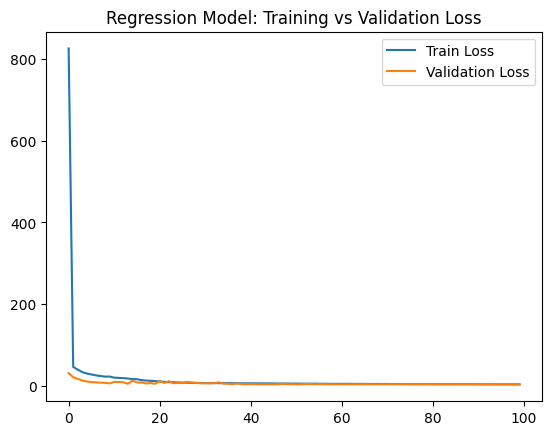

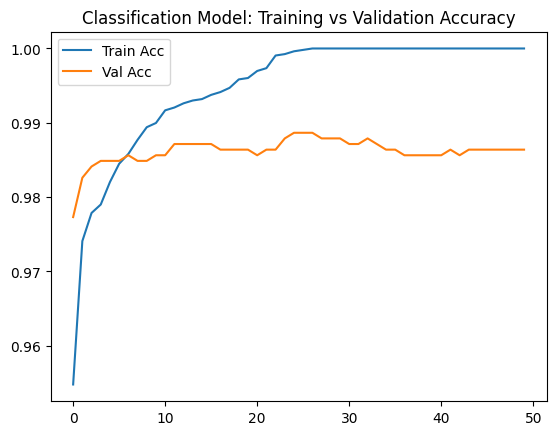

In [50]:
# Plot training and validation loss over epochs for the regression model.
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Regression Model: Training vs Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy over epochs for the classification model.
plt.plot(history_clf.history['accuracy'], label='Train Acc')
plt.plot(history_clf.history['val_accuracy'], label='Val Acc')
plt.title('Classification Model: Training vs Validation Accuracy')
plt.legend()
plt.show()

## Conclusion

Key factors influencing student performance include parental involvement, access to resources, and sleep hours, as observed in box plots and correlation heatmaps.

**Regression Model (predicting exam scores, 100 epochs):**
- Validation MAE ≈ 0.89
- Validation MSE ≈ 4.48
- R² Score ≈ 0.69

These metrics indicate a moderately strong ability to predict exam scores, with residuals fairly centered around zero.

**Classification Model (predicting performance levels, 50 epochs):**
- Training Accuracy: 100%
- Validation Accuracy: ≈ 98.6%

The model demonstrates excellent generalization and can confidently classify students into 'Low', 'Medium', or 'High' performance levels. Training curves show consistent convergence without overfitting, thanks to dropout layers and proper regularization.

**Insights:**  
These results highlight academic and behavioral factors that significantly influence student performance and demonstrate how deep learning can provide predictive insights in educational data science.
